In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Introducción

> Lo que no se define no se puede medir. **Lo que no se mide, no se puede mejorar**. Lo que no se mejora, se degrada siempre.

*William Thomson Kelvin (Lord Kelvin)*, físico y matemático británico (1824 – 1907) 

## Datos privados.

Este principio es fundamental para cualquier organización y por eso las empresas registran los datos generados en las actividades que definen a sus procesos: 

* Ventas.
* Producción.
* Atención al cliente.
* Finanzas.
* Recursos humanos.

Esos datos son fundamentales para el funcionamiento de una empresa y son protegidos de forma celosa. Representan datos privados (con excepciones).

## Datos abiertos

El principio se aplica también a procesos fundamentales para cualquier sociedad, por ejemplo:

* Educación.
* Salud.
* Seguridad.
* Medio ambiente.

Son los gobiernos los que gestionan estos procesos y, a diferencia de lo que sucede con los datos empresariales, los generados en ellos son de interés para toda la comunidad y deben ser **difundidos de forma simple y transparente**. Deben ser datos abiertos (con excepciones).

Abrir los datos a la sociedad es una condición necesaria para la vigilancia, el control y la mejora continua de esos procesos. La comunidad debe participar analizando de forma objetiva y efectiva esos datos.



# Objetivo

El objetivo de este taller es fomentar entre los asistentes la exploración de repositorios de datos abiertos ejemplificando su análisis con un caso de estudio.  

# Censo de Población y Vivienda 2020

En esta sección exploraremos los datos del Censo de Población y Vivienda del 2020 publicados por el INEGI y disponibles en el siguiente enlace:

https://www.inegi.org.mx/programas/ccpv/2020/#Datos_abiertos

Estos datos contienen el resumen de las respuestas obtenidas a las preguntas del [cuestionario básico](https://www.inegi.org.mx/contenidos/programas/ccpv/2020/doc/Censo2020_cuest_basico.pdf).  

* Restringiremos el análisis a las **áreas geoestadísticas básicas**, [AGEB](https://https://www.inegi.org.mx/app/glosario/default.html?p=localidades) de la ciudad de Cancún.  

* A partir del resumen de las respuestas al cuestionario básico, describiremos las AGEB de la ciudad y formaremos grupos con caraterísticas similares [características demográficas, educativas, económicas, vivienda].


## Lectura de datos

In [5]:
dat = pd.read_csv("/content/conjunto_de_datos_ageb_urbana_23_cpv2020.csv", na_values=["*", 'N/D'], dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str,  'AGEB': str, 'MZA': str})
dat.head(n=20)

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,23,Quintana Roo,000,Total de la entidad Quintana Roo,0000,Total de la entidad,0000,000,1857985,921206.0,...,158739.0,526202.0,319194.0,267556.0,131827.0,55902.0,43642.0,36378.0,221620.0,12239.0
1,23,Quintana Roo,001,Cozumel,0000,Total del municipio,0000,000,88626,44211.0,...,10260.0,24637.0,18534.0,14886.0,7631.0,2728.0,1392.0,1301.0,7035.0,383.0
2,23,Quintana Roo,001,Cozumel,0001,Total de la localidad urbana,0000,000,84519,42292.0,...,10208.0,23579.0,18017.0,14511.0,7462.0,2677.0,1257.0,1153.0,6380.0,317.0
3,23,Quintana Roo,001,Cozumel,0001,Total AGEB urbana,0028,000,2178,1136.0,...,364.0,687.0,523.0,470.0,245.0,79.0,41.0,33.0,203.0,8.0
4,23,Quintana Roo,001,Cozumel,0001,Cozumel,0028,001,87,44.0,...,18.0,30.0,27.0,21.0,12.0,6.0,0.0,0.0,NaN,0.0
5,23,Quintana Roo,001,Cozumel,0001,Cozumel,0028,002,63,35.0,...,14.0,28.0,25.0,17.0,15.0,5.0,3.0,0.0,3.0,0.0
6,23,Quintana Roo,001,Cozumel,0001,Cozumel,0028,003,133,64.0,...,19.0,37.0,30.0,24.0,16.0,6.0,0.0,NaN,10.0,0.0
7,23,Quintana Roo,001,Cozumel,0001,Cozumel,0028,004,70,32.0,...,12.0,23.0,17.0,21.0,9.0,6.0,0.0,0.0,6.0,0.0
8,23,Quintana Roo,001,Cozumel,0001,Cozumel,0028,005,43,26.0,...,12.0,19.0,11.0,11.0,5.0,NaN,NaN,NaN,9.0,NaN
9,23,Quintana Roo,001,Cozumel,0001,Cozumel,0028,006,57,29.0,...,11.0,18.0,12.0,16.0,4.0,NaN,NaN,NaN,9.0,0.0


## Estructura de los datos

¿Cuántas filas?, ¿cuántas columnas?

In [3]:
dat.shape

(26915, 230)

¿Tipos de datos?

In [4]:
dat.dtypes

ENTIDAD         object
NOM_ENT         object
MUN             object
NOM_MUN         object
LOC             object
                ...   
VPH_CVJ        float64
VPH_SINRTV     float64
VPH_SINLTC     float64
VPH_SINCINT    float64
VPH_SINTIC     float64
Length: 230, dtype: object

## Exploración de algunas columnas


In [6]:
dat['TVIVPARHAB']

0        575489.0
1         26413.0
2         25178.0
3           754.0
4            30.0
           ...   
26910         6.0
26911         NaN
26912         NaN
26913         8.0
26914        10.0
Name: TVIVPARHAB, Length: 26915, dtype: float64

In [7]:
dat['TVIVPARHAB'].describe()

count     24913.000000
mean        109.478064
std        4593.806272
min           0.000000
25%           7.000000
50%          17.000000
75%          30.000000
max      575489.000000
Name: TVIVPARHAB, dtype: float64

In [8]:
# columna con las claves de los municipios
dat['MUN'].describe()

count     26915
unique       12
top         005
freq      12848
Name: MUN, dtype: object

¿Cuántos municipios?

In [9]:
dat['MUN'].unique()

array(['000', '001', '002', '003', '004', '005', '006', '007', '008',
       '009', '010', '011'], dtype=object)

¿Cuáles municipios?

In [10]:
dat['NOM_MUN'].unique()

array(['Total de la entidad Quintana Roo', 'Cozumel',
       'Felipe Carrillo Puerto', 'Isla Mujeres', 'Othón P. Blanco',
       'Benito Juárez', 'José María Morelos', 'Lázaro Cárdenas',
       'Solidaridad', 'Tulum', 'Bacalar', 'Puerto Morelos'], dtype=object)

¿Localidades?

In [12]:
dat['NOM_LOC'].unique()

array(['Total de la entidad', 'Total del municipio',
       'Total de la localidad urbana', 'Total AGEB urbana', 'Cozumel',
       'Felipe Carrillo Puerto', 'Chunhuhub', 'Señor', 'Tepich',
       'Tihosuco', 'Isla Mujeres', 'Zona Urbana Ejido Isla Mujeres',
       'Chetumal', 'Calderitas', 'Mahahual', 'Nicolás Bravo',
       'Javier Rojo Gómez', 'Álvaro Obregón', 'Sergio Butrón Casas',
       'Cancún', 'Alfredo V. Bonfil', 'Dziuché', 'José María Morelos',
       'Kantunilkín', 'Playa del Carmen', 'Puerto Aventuras', 'Tulum',
       'Bacalar', 'Limones', 'Maya Balam', 'Puerto Morelos',
       'Leona Vicario'], dtype=object)

## Filtros

Seleccionamos únicamente registros correspondientes a los totales de las AGEB. 

In [13]:
df = dat[dat['NOM_LOC'] == 'Total AGEB urbana']
df.head() 

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
3,23,Quintana Roo,001,Cozumel,0001,Total AGEB urbana,0028,000,2178,1136.0,...,364.0,687.0,523.0,470.0,245.0,79.0,41.0,33.0,203.0,8.0
52,23,Quintana Roo,001,Cozumel,0001,Total AGEB urbana,0032,000,2909,1496.0,...,415.0,878.0,622.0,543.0,212.0,87.0,52.0,47.0,296.0,7.0
98,23,Quintana Roo,001,Cozumel,0001,Total AGEB urbana,0051,000,3202,1584.0,...,505.0,1045.0,796.0,775.0,322.0,95.0,42.0,38.0,276.0,5.0
147,23,Quintana Roo,001,Cozumel,0001,Total AGEB urbana,0070,000,1087,548.0,...,204.0,371.0,303.0,262.0,188.0,38.0,23.0,12.0,75.0,NaN
195,23,Quintana Roo,001,Cozumel,0001,Total AGEB urbana,0403,000,498,257.0,...,38.0,145.0,113.0,48.0,50.0,31.0,NaN,0.0,18.0,0.0


Limitamos también el análisis a los datos de la ciudad de Cancún:

In [14]:
df = df[(df['MUN']=='005') & (df['LOC']=='0001')]
df.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
6820,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,0012,000,1063,566.0,...,162.0,406.0,363.0,183.0,291.0,144.0,11.0,5.0,24.0,NaN
6846,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,0027,000,1869,861.0,...,65.0,622.0,215.0,187.0,63.0,25.0,94.0,75.0,398.0,44.0
6870,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,0031,000,1436,703.0,...,32.0,418.0,154.0,194.0,50.0,30.0,25.0,24.0,247.0,5.0
6883,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,0046,000,371,186.0,...,3.0,82.0,32.0,29.0,24.0,9.0,5.0,4.0,45.0,NaN
6898,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,0050,000,36,19.0,...,0.0,14.0,7.0,9.0,3.0,4.0,NaN,0.0,6.0,0.0


**¿Cuántas AGEB?**

Nos aseguramos de tener una AGEB por fila.



In [15]:
df.shape

(411, 230)

In [16]:
df['AGEB'].unique()

array(['0012', '0027', '0031', '0046', '0050', '0065', '007A', '0084',
       '0099', '0101', '0116', '0120', '0135', '014A', '0154', '0169',
       '0173', '0188', '0192', '0205', '021A', '0224', '0239', '0243',
       '0258', '0277', '0281', '0296', '0309', '0313', '0328', '0332',
       '0347', '0351', '0366', '0370', '0385', '039A', '0402', '0417',
       '0421', '0436', '0440', '0455', '0474', '0489', '0510', '0544',
       '0578', '0582', '0597', '060A', '0614', '0629', '0633', '0648',
       '0652', '0737', '0794', '0826', '0883', '0898', '0900', '0934',
       '0949', '0953', '0968', '0972', '1010', '1025', '103A', '1044',
       '1059', '1063', '1078', '1082', '1097', '110A', '1114', '1129',
       '1133', '1148', '1152', '1167', '1171', '1186', '1190', '1203',
       '1218', '1222', '1237', '1241', '1256', '1260', '1275', '128A',
       '1311', '1326', '1330', '1345', '1364', '1415', '142A', '1434',
       '1449', '1453', '1468', '1472', '1487', '1491', '1504', '1519',
      

In [17]:
len(df['AGEB'].unique())

411

Algunas AGEB no tienen población:

In [18]:
df[df['POBTOT'] == 0]

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
7309,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,0173,000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8480,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,0633,000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12021,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,2447,000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13266,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,3182,000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13993,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,3464,000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14863,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,3746,000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16190,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,4231,000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16199,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,4246,000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16209,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,4265,000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16424,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,4369,000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df = df[df['POBTOT'] != 0]
df.shape

(395, 230)

## Selección de columnas de interés

Restringimos el análisis a las siguientes variables:

In [20]:
cols_interes = ['POBTOT', 'POB0_14', 'POB65_MAS', 'REL_H_M', 'PROM_HNV', 'PNACOE', 'PRESOE15', 
                'P15YM_SE', 'P18A24A', 'P8A14AN', 'GRAPROES', 'PEA', 'POCUPADA', 'PDESOCUP', 'PDER_SS', 'P12YM_SOLT', 
                'TVIVPARHAB', 'PROM_OCUP', 'VPH_PISODT', 'VPH_PISOTI', 'VPH_1DOR', 'VPH_3YMASC', 'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_AEASP', 
                'VPH_TINACO', 'VPH_DSADMA', 'VPH_REFRI', 'VPH_LAVAD', 'VPH_AUTOM', 'VPH_TV', 'VPH_PC', 
                'VPH_TELEF', 'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI'
                ] 

In [21]:
len(cols_interes)

37

In [22]:
df_sub = df[cols_interes]
df_sub.head()

,POBTOT,POB0_14,POB65_MAS,REL_H_M,PROM_HNV,PNACOE,PRESOE15,P15YM_SE,P18A24A,P8A14AN,...,VPH_REFRI,VPH_LAVAD,VPH_AUTOM,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI
6820,1063,236.0,48.0,87.81,1.17,698.0,287.0,0.0,32.0,3.0,...,409.0,378.0,338.0,396.0,345.0,162.0,406.0,363.0,183.0,291.0
6846,1869,461.0,9.0,117.07,1.31,1250.0,650.0,14.0,22.0,3.0,...,659.0,555.0,100.0,585.0,182.0,65.0,622.0,215.0,187.0,63.0
6870,1436,432.0,NaN,104.27,1.43,1018.0,520.0,10.0,21.0,NaN,...,403.0,328.0,59.0,387.0,94.0,32.0,418.0,154.0,194.0,50.0
6883,371,73.0,4.0,99.46,1.38,184.0,65.0,5.0,4.0,0.0,...,78.0,62.0,36.0,77.0,33.0,3.0,82.0,32.0,29.0,24.0
6898,36,7.0,0.0,89.47,1.20,31.0,27.0,0.0,NaN,0.0,...,14.0,12.0,6.0,13.0,5.0,0.0,14.0,7.0,9.0,3.0


# Exploración de datos

## Valores faltantes

¿Los datos registrados de cada variable están completos?

In [23]:
tot_isna = df_sub.isna().sum()
tot_isna

POBTOT         0
POB0_14        9
POB65_MAS     24
REL_H_M        7
PROM_HNV       7
PNACOE         8
PRESOE15      12
P15YM_SE      40
P18A24A       17
P8A14AN       88
GRAPROES       7
PEA            7
POCUPADA       7
PDESOCUP      33
PDER_SS        7
P12YM_SOLT     9
TVIVPARHAB     7
PROM_OCUP      7
VPH_PISODT     8
VPH_PISOTI    85
VPH_1DOR      11
VPH_3YMASC    12
VPH_C_ELEC     9
VPH_AGUADV     8
VPH_AEASP     22
VPH_TINACO    11
VPH_DSADMA     8
VPH_REFRI      9
VPH_LAVAD      9
VPH_AUTOM      9
VPH_TV         9
VPH_PC        14
VPH_TELEF     24
VPH_CEL        8
VPH_INTER     12
VPH_STVP      11
VPH_SPMVPI    14
dtype: int64

In [24]:
tot_isna.sort_values(ascending=False)

P8A14AN       88
VPH_PISOTI    85
P15YM_SE      40
PDESOCUP      33
POB65_MAS     24
VPH_TELEF     24
VPH_AEASP     22
P18A24A       17
VPH_PC        14
VPH_SPMVPI    14
PRESOE15      12
VPH_INTER     12
VPH_3YMASC    12
VPH_TINACO    11
VPH_STVP      11
VPH_1DOR      11
VPH_AUTOM      9
P12YM_SOLT     9
VPH_LAVAD      9
VPH_REFRI      9
POB0_14        9
VPH_C_ELEC     9
VPH_TV         9
VPH_CEL        8
VPH_DSADMA     8
VPH_PISODT     8
VPH_AGUADV     8
PNACOE         8
PROM_OCUP      7
TVIVPARHAB     7
PDER_SS        7
POCUPADA       7
PEA            7
GRAPROES       7
PROM_HNV       7
REL_H_M        7
POBTOT         0
dtype: int64

In [25]:
tot_isna.sort_values(ascending=False)/len(df)*100

P8A14AN       22.278481
VPH_PISOTI    21.518987
P15YM_SE      10.126582
PDESOCUP       8.354430
POB65_MAS      6.075949
VPH_TELEF      6.075949
VPH_AEASP      5.569620
P18A24A        4.303797
VPH_PC         3.544304
VPH_SPMVPI     3.544304
PRESOE15       3.037975
VPH_INTER      3.037975
VPH_3YMASC     3.037975
VPH_TINACO     2.784810
VPH_STVP       2.784810
VPH_1DOR       2.784810
VPH_AUTOM      2.278481
P12YM_SOLT     2.278481
VPH_LAVAD      2.278481
VPH_REFRI      2.278481
POB0_14        2.278481
VPH_C_ELEC     2.278481
VPH_TV         2.278481
VPH_CEL        2.025316
VPH_DSADMA     2.025316
VPH_PISODT     2.025316
VPH_AGUADV     2.025316
PNACOE         2.025316
PROM_OCUP      1.772152
TVIVPARHAB     1.772152
PDER_SS        1.772152
POCUPADA       1.772152
PEA            1.772152
GRAPROES       1.772152
PROM_HNV       1.772152
REL_H_M        1.772152
POBTOT         0.000000
dtype: float64

¿Eliminamos las variables con valores nulos?

In [26]:
df_sub.dropna(axis=1).shape

(395, 1)

¿Eliminamos las filas con valores nulos?

In [27]:
df_sub.dropna(axis=0).shape

(208, 37)

**¿Qué hacemos con los datos faltantes?**

## Estadísticas descriptivas


In [28]:
df_sub['GRAPROES'].mean()

10.981675257731958

In [29]:
df_sub['GRAPROES'].median()

10.355

In [30]:
df_sub['GRAPROES'].std()

2.2291104418512373

In [31]:
df_sub['GRAPROES'].describe()

count    388.000000
mean      10.981675
std        2.229110
min        6.510000
25%        9.390000
50%       10.355000
75%       12.885000
max       16.350000
Name: GRAPROES, dtype: float64

## Gráficas

<Axes: ylabel='Frequency'>

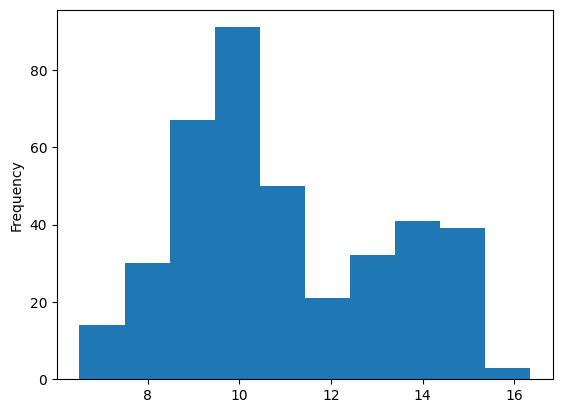

In [32]:
df_sub['GRAPROES'].plot.hist()

<Axes: >

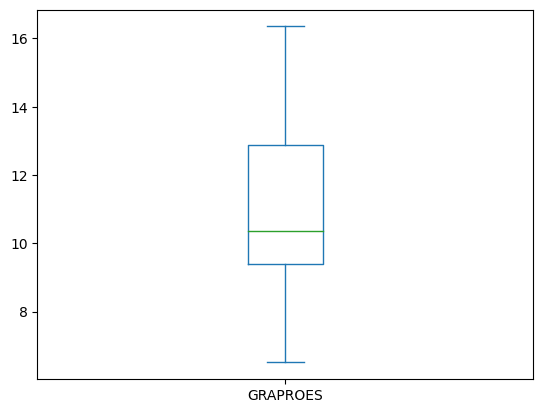

In [33]:
df_sub['GRAPROES'].plot.box()

<Axes: ylabel='Frequency'>

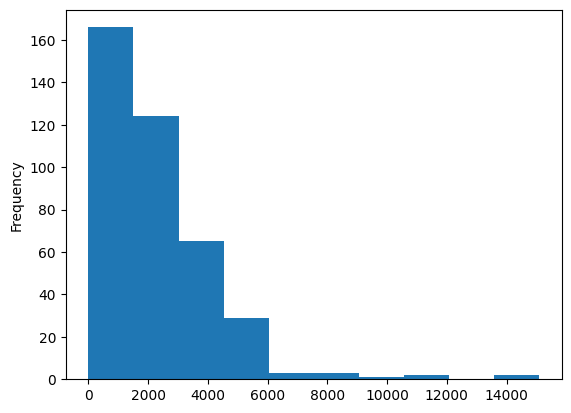

In [34]:
df_sub['POBTOT'].plot.hist()

<Axes: >

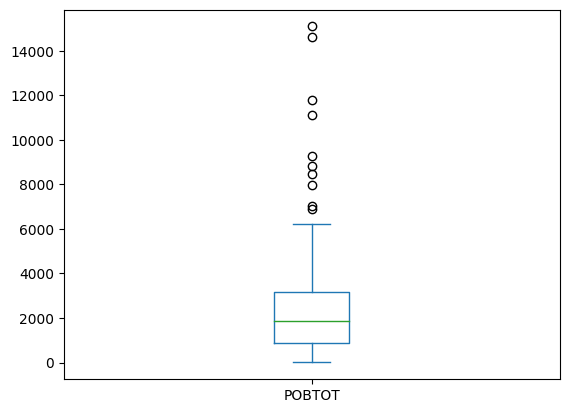

In [35]:
df_sub['POBTOT'].plot.box()

# Preparación de datos


## Transformación de variables

Normalizamos variables relacionadas con la población.

In [36]:
cols_pob = ['POB0_14', 'POB65_MAS', 'PNACOE', 'PRESOE15', 'P15YM_SE', 'P18A24A', 'P8A14AN',
            'PEA', 'POCUPADA', 'PDESOCUP', 'PDER_SS', 'P12YM_SOLT'
            ] 
df_sub[cols_pob] = df_sub[cols_pob].div(df_sub['POBTOT'], axis=0)
df_sub.head()  

<ipython-input-36-2c31dd1ec25e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[cols_pob] = df_sub[cols_pob].div(df_sub['POBTOT'], axis=0)


,POBTOT,POB0_14,POB65_MAS,REL_H_M,PROM_HNV,PNACOE,PRESOE15,P15YM_SE,P18A24A,P8A14AN,...,VPH_REFRI,VPH_LAVAD,VPH_AUTOM,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI
6820,1063,0.222013,0.045155,87.81,1.17,0.656632,0.269991,0.000000,0.030103,0.002822,...,409.0,378.0,338.0,396.0,345.0,162.0,406.0,363.0,183.0,291.0
6846,1869,0.246656,0.004815,117.07,1.31,0.668807,0.347780,0.007491,0.011771,0.001605,...,659.0,555.0,100.0,585.0,182.0,65.0,622.0,215.0,187.0,63.0
6870,1436,0.300836,NaN,104.27,1.43,0.708914,0.362117,0.006964,0.014624,NaN,...,403.0,328.0,59.0,387.0,94.0,32.0,418.0,154.0,194.0,50.0
6883,371,0.196765,0.010782,99.46,1.38,0.495957,0.175202,0.013477,0.010782,0.000000,...,78.0,62.0,36.0,77.0,33.0,3.0,82.0,32.0,29.0,24.0
6898,36,0.194444,0.000000,89.47,1.20,0.861111,0.750000,0.000000,NaN,0.000000,...,14.0,12.0,6.0,13.0,5.0,0.0,14.0,7.0,9.0,3.0


<Axes: ylabel='Frequency'>

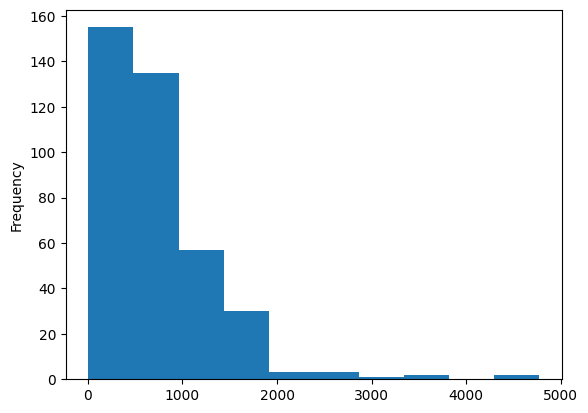

In [37]:
df_sub['TVIVPARHAB'].plot.hist()

<Axes: >

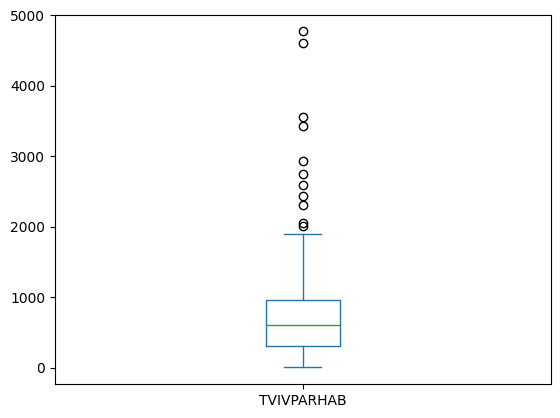

In [38]:
df_sub['TVIVPARHAB'].plot.box()

<Axes: >

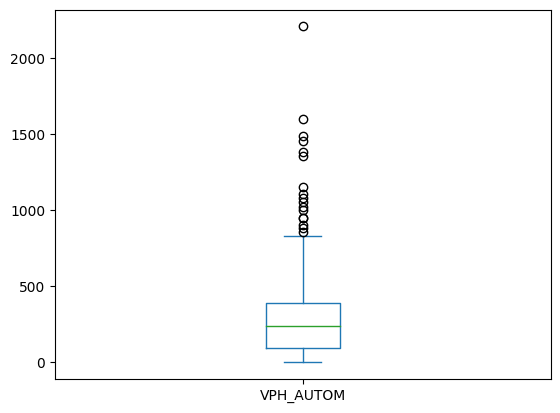

In [39]:
df_sub['VPH_AUTOM'].plot.box()

In [40]:
cols_viv = ['PROM_OCUP', 'VPH_PISODT', 'VPH_PISOTI', 'VPH_1DOR', 'VPH_3YMASC', 'VPH_C_ELEC', 'VPH_AGUADV', 'VPH_AEASP', 
                'VPH_TINACO', 'VPH_DSADMA', 'VPH_REFRI', 'VPH_LAVAD', 'VPH_AUTOM', 'VPH_TV', 'VPH_PC', 
                'VPH_TELEF', 'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI'
            ]
df_sub[cols_viv] = df_sub[cols_viv].div(df_sub['TVIVPARHAB'], axis=0) 
df_sub.head()

<ipython-input-40-3f297c7e4882>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[cols_viv] = df_sub[cols_viv].div(df_sub['TVIVPARHAB'], axis=0)


,POBTOT,POB0_14,POB65_MAS,REL_H_M,PROM_HNV,PNACOE,PRESOE15,P15YM_SE,P18A24A,P8A14AN,...,VPH_REFRI,VPH_LAVAD,VPH_AUTOM,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI
6820,1063,0.222013,0.045155,87.81,1.17,0.656632,0.269991,0.000000,0.030103,0.002822,...,0.978469,0.904306,0.808612,0.947368,0.825359,0.387560,0.971292,0.868421,0.437799,0.696172
6846,1869,0.246656,0.004815,117.07,1.31,0.668807,0.347780,0.007491,0.011771,0.001605,...,0.940086,0.791726,0.142653,0.834522,0.259629,0.092725,0.887304,0.306705,0.266762,0.089872
6870,1436,0.300836,NaN,104.27,1.43,0.708914,0.362117,0.006964,0.014624,NaN,...,0.911765,0.742081,0.133484,0.875566,0.212670,0.072398,0.945701,0.348416,0.438914,0.113122
6883,371,0.196765,0.010782,99.46,1.38,0.495957,0.175202,0.013477,0.010782,0.000000,...,0.666667,0.529915,0.307692,0.658120,0.282051,0.025641,0.700855,0.273504,0.247863,0.205128
6898,36,0.194444,0.000000,89.47,1.20,0.861111,0.750000,0.000000,NaN,0.000000,...,1.000000,0.857143,0.428571,0.928571,0.357143,0.000000,1.000000,0.500000,0.642857,0.214286


In [41]:
df_sub.drop(['POBTOT', 'TVIVPARHAB'], axis=1, inplace=True)
df_sub.head()

<ipython-input-41-dbb3258aca0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.drop(['POBTOT', 'TVIVPARHAB'], axis=1, inplace=True)


,POB0_14,POB65_MAS,REL_H_M,PROM_HNV,PNACOE,PRESOE15,P15YM_SE,P18A24A,P8A14AN,GRAPROES,...,VPH_REFRI,VPH_LAVAD,VPH_AUTOM,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI
6820,0.222013,0.045155,87.81,1.17,0.656632,0.269991,0.000000,0.030103,0.002822,14.79,...,0.978469,0.904306,0.808612,0.947368,0.825359,0.387560,0.971292,0.868421,0.437799,0.696172
6846,0.246656,0.004815,117.07,1.31,0.668807,0.347780,0.007491,0.011771,0.001605,10.43,...,0.940086,0.791726,0.142653,0.834522,0.259629,0.092725,0.887304,0.306705,0.266762,0.089872
6870,0.300836,NaN,104.27,1.43,0.708914,0.362117,0.006964,0.014624,NaN,10.35,...,0.911765,0.742081,0.133484,0.875566,0.212670,0.072398,0.945701,0.348416,0.438914,0.113122
6883,0.196765,0.010782,99.46,1.38,0.495957,0.175202,0.013477,0.010782,0.000000,10.91,...,0.666667,0.529915,0.307692,0.658120,0.282051,0.025641,0.700855,0.273504,0.247863,0.205128
6898,0.194444,0.000000,89.47,1.20,0.861111,0.750000,0.000000,NaN,0.000000,13.17,...,1.000000,0.857143,0.428571,0.928571,0.357143,0.000000,1.000000,0.500000,0.642857,0.214286


## Escalas 

<Axes: >

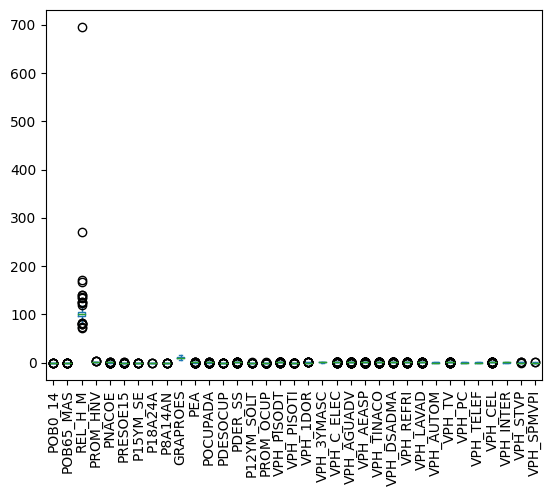

In [42]:
df_sub.plot.box(rot=90)

In [44]:
df[df['REL_H_M'] > 500]

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
11239,23,Quintana Roo,005,Benito Juárez,0001,Total AGEB urbana,1805,000,1608,202.0,...,16.0,65.0,44.0,36.0,13.0,4.0,4.0,7.0,26.0,3.0


## Estandarización

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_st = scaler.fit_transform(df_sub) 
df_st

array([[ 0.00338222, -0.03690419, -0.46946658, ...,  1.03929511,
        -0.11150358,  1.78385905],
       [ 0.35488587, -1.05836592,  0.42212748, ..., -1.19766116,
        -1.26108309, -0.88063896],
       [ 1.12770237,         nan,  0.03209317, ..., -1.03155066,
        -0.10400953, -0.77846016],
       ...,
       [ 0.47283044, -0.06533449, -0.30949157, ..., -0.3504942 ,
         0.1284386 , -0.17304351],
       [ 0.63811924, -1.07158742,  0.15336946, ..., -1.46676619,
        -0.86234533, -0.99767154],
       [-0.72809412,         nan,  0.05433731, ..., -0.64913205,
        -1.31150912,  0.02653172]])

In [46]:
df_st = pd.DataFrame(df_st, columns=df_sub.columns)
df_st.head()

,POB0_14,POB65_MAS,REL_H_M,PROM_HNV,PNACOE,PRESOE15,P15YM_SE,P18A24A,P8A14AN,GRAPROES,...,VPH_REFRI,VPH_LAVAD,VPH_AUTOM,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI
0,0.003382,-0.036904,-0.469467,-1.401677,0.706638,1.545888,-1.105168,-0.279261,0.109894,1.710656,...,0.600551,1.064279,1.464455,0.535215,1.555245,0.183843,0.337827,1.039295,-0.111504,1.783859
1,0.354886,-1.058366,0.422127,-0.968379,0.823786,2.372509,-0.715519,-1.302283,-0.407602,-0.247806,...,0.328832,0.232688,-1.192228,-0.373035,-0.692927,-1.008167,-0.373485,-1.197661,-1.261083,-0.880639
2,1.127702,NaN,0.032093,-0.596981,1.209707,2.524865,-0.742925,-1.143077,NaN,-0.283741,...,0.128346,-0.134020,-1.228807,-0.042694,-0.879540,-1.090346,0.121096,-1.031551,-0.104010,-0.778460
3,-0.356749,-0.907292,-0.114474,-0.751730,-0.839431,0.538623,-0.404115,-1.357491,-1.090105,-0.032196,...,-1.606727,-1.701224,-0.533845,-1.792820,-0.603823,-1.279384,-1.952561,-1.329877,-1.388104,-0.374123
4,-0.389857,-1.180299,-0.418884,-1.308828,2.674199,6.646686,-1.105168,NaN,-1.090105,0.982971,...,0.752972,0.715899,-0.051627,0.383926,-0.305414,-1.383050,0.580962,-0.427890,1.266737,-0.333879


<Axes: >

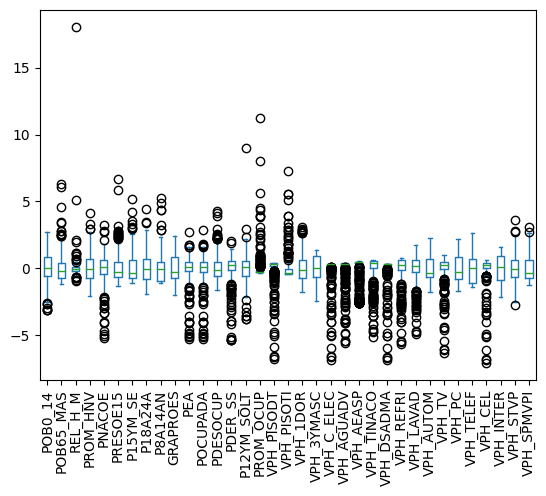

In [47]:
df_st.plot.box(rot=90)

Imputamos valores faltantes

In [48]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_st = imp_mean.fit_transform(df_st)
df_st

array([[ 3.38221768e-03, -3.69041939e-02, -4.69466577e-01, ...,
         1.03929511e+00, -1.11503583e-01,  1.78385905e+00],
       [ 3.54885875e-01, -1.05836592e+00,  4.22127482e-01, ...,
        -1.19766116e+00, -1.26108309e+00, -8.80638955e-01],
       [ 1.12770237e+00,  3.83041906e-17,  3.20931704e-02, ...,
        -1.03155066e+00, -1.04009528e-01, -7.78460157e-01],
       ...,
       [ 4.72830439e-01, -6.53344909e-02, -3.09491567e-01, ...,
        -3.50494197e-01,  1.28438602e-01, -1.73043514e-01],
       [ 6.38119237e-01, -1.07158742e+00,  1.53369464e-01, ...,
        -1.46676619e+00, -8.62345328e-01, -9.97671536e-01],
       [-7.28094119e-01,  3.83041906e-17,  5.43373147e-02, ...,
        -6.49132050e-01, -1.31150912e+00,  2.65317212e-02]])

In [49]:
df_st = pd.DataFrame(df_st, columns=df_sub.columns)
df_st.head()

,POB0_14,POB65_MAS,REL_H_M,PROM_HNV,PNACOE,PRESOE15,P15YM_SE,P18A24A,P8A14AN,GRAPROES,...,VPH_REFRI,VPH_LAVAD,VPH_AUTOM,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI
0,0.003382,-3.690419e-02,-0.469467,-1.401677,0.706638,1.545888,-1.105168,-2.792609e-01,1.098942e-01,1.710656,...,0.600551,1.064279,1.464455,0.535215,1.555245,0.183843,0.337827,1.039295,-0.111504,1.783859
1,0.354886,-1.058366e+00,0.422127,-0.968379,0.823786,2.372509,-0.715519,-1.302283e+00,-4.076016e-01,-0.247806,...,0.328832,0.232688,-1.192228,-0.373035,-0.692927,-1.008167,-0.373485,-1.197661,-1.261083,-0.880639
2,1.127702,3.830419e-17,0.032093,-0.596981,1.209707,2.524865,-0.742925,-1.143077e+00,3.471707e-17,-0.283741,...,0.128346,-0.134020,-1.228807,-0.042694,-0.879540,-1.090346,0.121096,-1.031551,-0.104010,-0.778460
3,-0.356749,-9.072916e-01,-0.114474,-0.751730,-0.839431,0.538623,-0.404115,-1.357491e+00,-1.090105e+00,-0.032196,...,-1.606727,-1.701224,-0.533845,-1.792820,-0.603823,-1.279384,-1.952561,-1.329877,-1.388104,-0.374123
4,-0.389857,-1.180299e+00,-0.418884,-1.308828,2.674199,6.646686,-1.105168,1.879743e-16,-1.090105e+00,0.982971,...,0.752972,0.715899,-0.051627,0.383926,-0.305414,-1.383050,0.580962,-0.427890,1.266737,-0.333879


In [50]:
df_st.isna().sum()

POB0_14       0
POB65_MAS     0
REL_H_M       0
PROM_HNV      0
PNACOE        0
PRESOE15      0
P15YM_SE      0
P18A24A       0
P8A14AN       0
GRAPROES      0
PEA           0
POCUPADA      0
PDESOCUP      0
PDER_SS       0
P12YM_SOLT    0
PROM_OCUP     0
VPH_PISODT    0
VPH_PISOTI    0
VPH_1DOR      0
VPH_3YMASC    0
VPH_C_ELEC    0
VPH_AGUADV    0
VPH_AEASP     0
VPH_TINACO    0
VPH_DSADMA    0
VPH_REFRI     0
VPH_LAVAD     0
VPH_AUTOM     0
VPH_TV        0
VPH_PC        0
VPH_TELEF     0
VPH_CEL       0
VPH_INTER     0
VPH_STVP      0
VPH_SPMVPI    0
dtype: int64

# Análisis de factores

Utilizar más de 30 variables para describir a las AGEB resulta excesivo. Utilizaremos una técnica denominada **análisis de factores** en la que suponemos que las variables originales se explican por un conjunto pequeño de **factores ocultos**. Como ejemplo, podríamos pensar que las variables:

* ```Grado promedio de estudios```
* ```Adultos que no saben leer ni escribir```
* ```Adultos que asisten a la escuela```
*  ```Adutlos sin estudios```

son la consecuencia de un factor oculto que podríamos denominar ```nivel educativo```.

> Con el análisis de factores debemos identificar cuántos y cuáles factores ocultos explican a las variables originales. 

Los factores representan **nuevas variables** a partir de las cuales podemos interpretar los datos. La idea es que el número de factores sea muy pequeño comparado con el total de variables originales.

## Correlación entre variables

La determinación de los factores se basa en la matriz de correlaciones de los datos:

In [51]:
df_st.corr()

,POB0_14,POB65_MAS,REL_H_M,PROM_HNV,PNACOE,PRESOE15,P15YM_SE,P18A24A,P8A14AN,GRAPROES,...,VPH_REFRI,VPH_LAVAD,VPH_AUTOM,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI
POB0_14,1.000000,-0.583091,-0.083040,0.369553,0.249739,0.244323,0.249599,-0.450157,0.418646,-0.611641,...,0.066796,0.107016,-0.480619,0.193693,-0.524918,-0.590979,0.346132,-0.533943,-0.402456,-0.496140
POB65_MAS,-0.583091,1.000000,-0.108786,-0.046354,0.089256,-0.175611,-0.046363,0.329154,-0.220933,0.407763,...,0.154484,0.117515,0.524113,0.132721,0.538449,0.613117,0.089389,0.530972,0.490280,0.484065
REL_H_M,-0.083040,-0.108786,1.000000,-0.002366,0.054230,-0.009415,0.143392,-0.061637,-0.016025,-0.177214,...,-0.117514,-0.179825,-0.154908,-0.072700,-0.172799,-0.147927,-0.017102,-0.128874,-0.129161,-0.152039
PROM_HNV,0.369553,-0.046354,-0.002366,1.000000,-0.203069,-0.326456,0.749885,-0.117762,0.338803,-0.774419,...,-0.312788,-0.223055,-0.505524,-0.180076,-0.608003,-0.377134,-0.019849,-0.514694,-0.408617,-0.613299
PNACOE,0.249739,0.089256,0.054230,-0.203069,1.000000,0.543695,-0.129251,0.000951,0.071883,0.107260,...,0.591397,0.429345,0.274451,0.622750,0.257474,0.150095,0.769202,0.288511,0.308167,0.261638
PRESOE15,0.244323,-0.175611,-0.009415,-0.326456,0.543695,1.000000,-0.275509,-0.339262,0.039699,0.159209,...,0.026879,-0.114353,-0.075922,0.024540,0.006217,-0.245697,0.176779,-0.075430,-0.052085,0.075059
P15YM_SE,0.249599,-0.046363,0.143392,0.749885,-0.129251,-0.275509,1.000000,-0.073127,0.299839,-0.683023,...,-0.316854,-0.200048,-0.356778,-0.160367,-0.480915,-0.303950,-0.021273,-0.414818,-0.415444,-0.453171
P18A24A,-0.450157,0.329154,-0.061637,-0.117762,0.000951,-0.339262,-0.073127,1.000000,-0.250364,0.329812,...,0.283554,0.412956,0.553669,0.280067,0.514190,0.621834,0.175485,0.588323,0.468132,0.464103
P8A14AN,0.418646,-0.220933,-0.016025,0.338803,0.071883,0.039699,0.299839,-0.250364,1.000000,-0.431862,...,-0.058861,-0.055630,-0.353067,-0.017039,-0.378005,-0.322810,0.102879,-0.347722,-0.278599,-0.350217
GRAPROES,-0.611641,0.407763,-0.177214,-0.774419,0.107260,0.159209,-0.683023,0.329812,-0.431862,1.000000,...,0.241752,0.239423,0.801479,0.116079,0.854285,0.660288,-0.051022,0.724380,0.591109,0.862985


## Mapa de calor

Visualizamos la matriz de correlaciones como un mapa de calor.

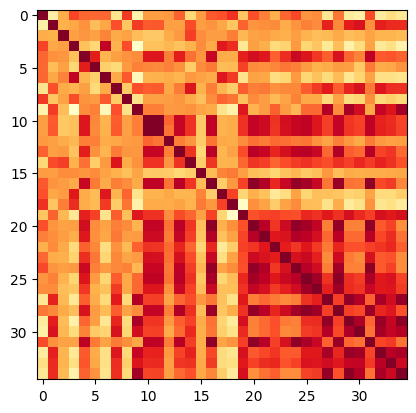

In [56]:
plt.imshow(df_st.corr(), cmap='YlOrRd')

**Interpretación de la correlación** 

Construyamos una gráfica de dispersión entre dos variables con correlación positiva y alta.

<Axes: xlabel='PNACOE', ylabel='PEA'>

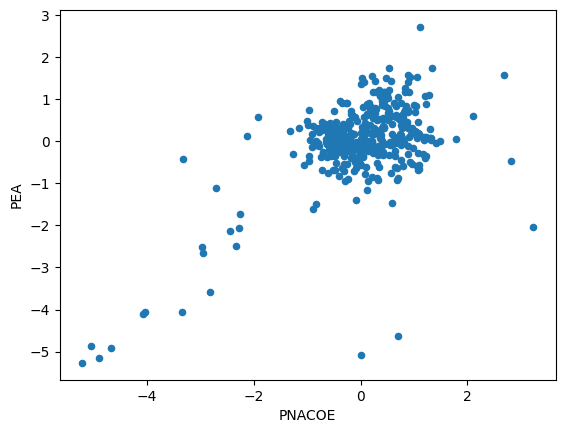

In [57]:
df_st.plot.scatter(x='PNACOE', y='PEA')

In [58]:
df_st.corr()['GRAPROES']

POB0_14      -0.611641
POB65_MAS     0.407763
REL_H_M      -0.177214
PROM_HNV     -0.774419
PNACOE        0.107260
PRESOE15      0.159209
P15YM_SE     -0.683023
P18A24A       0.329812
P8A14AN      -0.431862
GRAPROES      1.000000
PEA           0.164362
POCUPADA      0.166221
PDESOCUP      0.031733
PDER_SS       0.043830
P12YM_SOLT    0.082739
PROM_OCUP    -0.027029
VPH_PISODT   -0.070380
VPH_PISOTI   -0.443135
VPH_1DOR     -0.603651
VPH_3YMASC    0.577776
VPH_C_ELEC   -0.122754
VPH_AGUADV    0.028621
VPH_AEASP     0.271187
VPH_TINACO    0.023599
VPH_DSADMA   -0.137345
VPH_REFRI     0.241752
VPH_LAVAD     0.239423
VPH_AUTOM     0.801479
VPH_TV        0.116079
VPH_PC        0.854285
VPH_TELEF     0.660288
VPH_CEL      -0.051022
VPH_INTER     0.724380
VPH_STVP      0.591109
VPH_SPMVPI    0.862985
Name: GRAPROES, dtype: float64

<Axes: xlabel='GRAPROES', ylabel='PROM_HNV'>

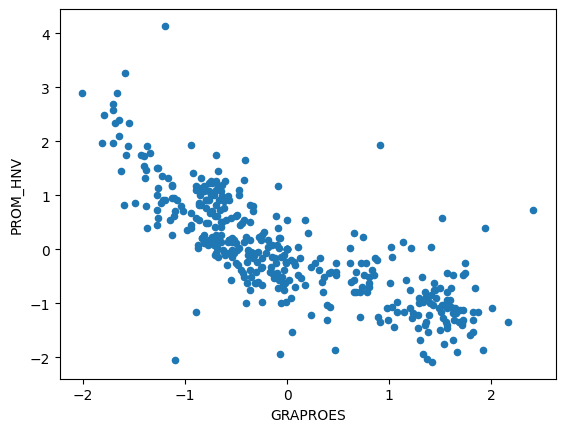

In [59]:
df_st.plot.scatter(x='GRAPROES', y='PROM_HNV')

> Si varias variables tienen una correlación muy alta, es probable que sean originadas por un mismo factor.

## Total de factores

Determinamos el total de factores necesarios para explicar los datos a partir de los valores propios de la matriz de correlaciones [¿cuántos son mayores a una unidad?]. 

In [62]:
l,u = np.linalg.eig(df_st.corr())
np.round(l, 1)

array([13.4,  6.9,  2.9,  1.8,  1.5,  1.3,  1. ,  0.9,  0.8,  0.7,  0.6,
        0.4,  0.4,  0.3,  0.3,  0.2,  0.2,  0.2,  0.2,  0.2,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ])

Aplicamos ahora el análisis de factores para identificar grupos de variables. 

In [63]:
from sklearn.decomposition import FactorAnalysis

transformer = FactorAnalysis(n_components=4, random_state=10, rotation='varimax')
df_transformed = transformer.fit_transform(df_st)
df_transformed.shape

(395, 4)

Valores de las nuevas variables:

In [64]:
df_tra = pd.DataFrame(df_transformed, columns=['f_'+str(i) for i in range(1,5)], index=df['AGEB'])
df_tra.head()

,f_1,f_2,f_3,f_4
AGEB,,,,
0012,-0.178034,1.393962,1.369904,-0.674129
0027,-0.163969,-1.095681,1.461557,-1.651884
0031,-0.238404,-1.074712,1.796963,-1.145849
0046,1.929332,-0.403555,0.741071,-0.705069
0050,-0.454177,-0.373852,4.149915,-1.606986


In [65]:
componts = pd.DataFrame(np.transpose(transformer.components_), index=df_st.columns, columns=df_tra.columns)
componts

,f_1,f_2,f_3,f_4
POB0_14,-0.334200,-0.617849,0.245365,0.137401
POB65_MAS,-0.047797,0.558186,-0.140582,0.223281
REL_H_M,0.026469,-0.155341,0.024635,0.082099
PROM_HNV,0.027568,-0.550989,-0.268680,0.633496
PNACOE,-0.681733,0.140909,0.543688,0.084105
PRESOE15,-0.099014,-0.047626,0.854479,-0.196806
P15YM_SE,0.034260,-0.394771,-0.199496,0.665503
P18A24A,-0.169425,0.520950,-0.372992,0.121447
P8A14AN,-0.097494,-0.351196,0.056371,0.178146
GRAPROES,0.099499,0.866990,0.158596,-0.374727


Algunas adecuaciones de signo [para mejorar la interpretabilidad]

In [66]:
df_tra['f_1'] = -df_tra['f_1']
componts['f_1'] = -componts['f_1']
#df_tra['f_3'] = -df_tra['f_3']
#componts['f_3'] = -componts['f_3']
componts

,f_1,f_2,f_3,f_4
POB0_14,0.334200,-0.617849,0.245365,0.137401
POB65_MAS,0.047797,0.558186,-0.140582,0.223281
REL_H_M,-0.026469,-0.155341,0.024635,0.082099
PROM_HNV,-0.027568,-0.550989,-0.268680,0.633496
PNACOE,0.681733,0.140909,0.543688,0.084105
PRESOE15,0.099014,-0.047626,0.854479,-0.196806
P15YM_SE,-0.034260,-0.394771,-0.199496,0.665503
P18A24A,0.169425,0.520950,-0.372992,0.121447
P8A14AN,0.097494,-0.351196,0.056371,0.178146
GRAPROES,-0.099499,0.866990,0.158596,-0.374727


# Georreferenciación

Visualicemos la distribución espacial de estoas factores.

In [ ]:
#!pip install geopandas

In [ ]:
#!pip install mapclassify

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
ageb_cun = gpd.read_file('/content/cancunAGEBS_2.geojson')
ageb_cun.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,2300500014119,23,005,0001,4119,"MULTIPOLYGON (((4054619.81260 1092053.05350, 4..."
1,2300500011881,23,005,0001,1881,"MULTIPOLYGON (((4064600.52660 1103506.17040, 4..."
2,230050001039A,23,005,0001,039A,"MULTIPOLYGON (((4070718.38620 1098425.59010, 4..."
3,2300500010402,23,005,0001,0402,"MULTIPOLYGON (((4071992.00840 1097844.79290, 4..."
4,2300500010417,23,005,0001,0417,"MULTIPOLYGON (((4073931.07120 1098070.21210, 4..."


Mapa de las AGEB de Cancún.

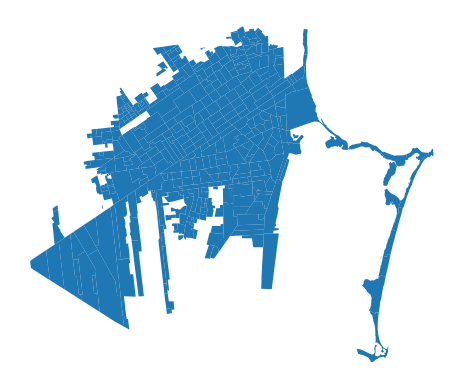

In [69]:
fig, ax = plt.subplots(1, 1)
ax.axis("off")
ageb_cun.plot(ax=ax, aspect=1, legend=False)
plt.show()

In [70]:
df_tra

,f_1,f_2,f_3,f_4
AGEB,,,,
0012,0.178034,1.393962,1.369904,-0.674129
0027,0.163969,-1.095681,1.461557,-1.651884
0031,0.238404,-1.074712,1.796963,-1.145849
0046,-1.929332,-0.403555,0.741071,-0.705069
0050,0.454177,-0.373852,4.149915,-1.606986
...,...,...,...,...
5600,0.314153,-1.065547,1.035146,-1.028117
5615,0.201597,-1.110590,1.995274,-0.930352
562A,0.116525,-0.290744,0.457936,-0.438202


## Clave de AGEB

Clave para identificar de forma única a cada AGEB (en la república mexicana). Se forma concatenando:

'ENTIDAD'+'MUN'+'LOC'+'AGEB'

In [71]:
df_tra['CVEGEO'] = df['ENTIDAD'].values+df['MUN'].values+df['LOC'].values+df['AGEB'].values
df_tra.head()

,f_1,f_2,f_3,f_4,CVEGEO
AGEB,,,,,
0012,0.178034,1.393962,1.369904,-0.674129,2300500010012
0027,0.163969,-1.095681,1.461557,-1.651884,2300500010027
0031,0.238404,-1.074712,1.796963,-1.145849,2300500010031
0046,-1.929332,-0.403555,0.741071,-0.705069,2300500010046
0050,0.454177,-0.373852,4.149915,-1.606986,2300500010050


Agregamos los datos censales.

In [72]:
ageb_cun_all = ageb_cun.merge(df_tra, on="CVEGEO")
ageb_cun_all.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry,f_1,f_2,f_3,f_4
0,2300500014119,23,005,0001,4119,"MULTIPOLYGON (((4054619.81260 1092053.05350, 4...",-0.098624,-1.050616,-0.106996,1.746843
1,2300500011881,23,005,0001,1881,"MULTIPOLYGON (((4064600.52660 1103506.17040, 4...",0.273860,-0.503392,-1.151784,0.304102
2,230050001039A,23,005,0001,039A,"MULTIPOLYGON (((4070718.38620 1098425.59010, 4...",-6.094017,0.173894,-0.986095,-1.192377
3,2300500010402,23,005,0001,0402,"MULTIPOLYGON (((4071992.00840 1097844.79290, 4...",0.286419,2.032477,-0.591180,0.782519
4,2300500010417,23,005,0001,0417,"MULTIPOLYGON (((4073931.07120 1098070.21210, 4...",0.220974,2.316464,0.818420,0.075511


<Axes: >

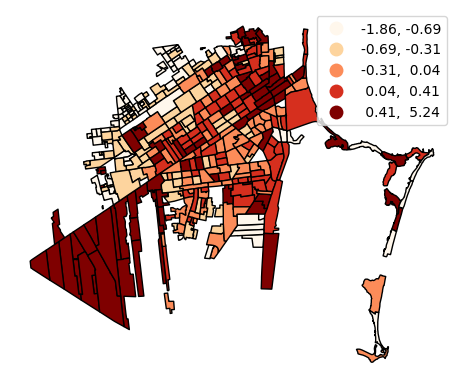

In [76]:
fig, ax = plt.subplots(1, 1)
ax.axis("off")
ageb_cun_all.plot('f_4', ax=ax, aspect=1, cmap='OrRd', edgecolor='k', scheme='quantiles', k=5, legend=True)

# Agrupamiento

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [78]:
factores = df_tra.drop('CVEGEO', axis=1)
factores.head()

,f_1,f_2,f_3,f_4
AGEB,,,,
0012,0.178034,1.393962,1.369904,-0.674129
0027,0.163969,-1.095681,1.461557,-1.651884
0031,0.238404,-1.074712,1.796963,-1.145849
0046,-1.929332,-0.403555,0.741071,-0.705069
0050,0.454177,-0.373852,4.149915,-1.606986


In [79]:
K = range(2, 10)
fits = []
score = []

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 10, n_init='auto')
    model.fit(factores)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(factores, model.labels_, metric='euclidean'))


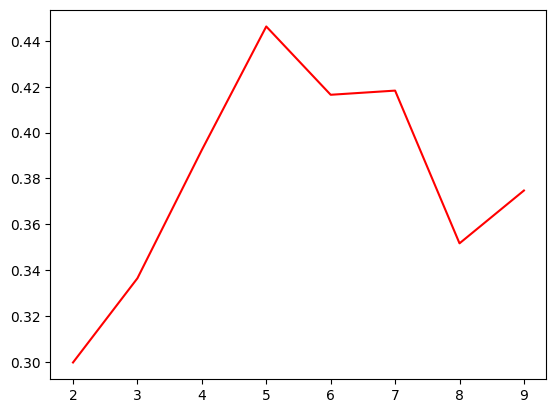

In [80]:
plt.plot(K, score, 'r')

In [81]:
model = KMeans(n_clusters = 5, random_state = 10, n_init='auto')
model.fit(factores)

KMeans(n_clusters=5, n_init='auto', random_state=10)

In [82]:
df_tra['gpo'] = model.labels_+1
df_tra.head()

,f_1,f_2,f_3,f_4,CVEGEO,gpo
AGEB,,,,,,
0012,0.178034,1.393962,1.369904,-0.674129,2300500010012,2
0027,0.163969,-1.095681,1.461557,-1.651884,2300500010027,4
0031,0.238404,-1.074712,1.796963,-1.145849,2300500010031,4
0046,-1.929332,-0.403555,0.741071,-0.705069,2300500010046,4
0050,0.454177,-0.373852,4.149915,-1.606986,2300500010050,4


In [83]:
ageb_cun_all = ageb_cun.merge(df_tra, on="CVEGEO")
ageb_cun_all.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry,f_1,f_2,f_3,f_4,gpo
0,2300500014119,23,005,0001,4119,"MULTIPOLYGON (((4054619.81260 1092053.05350, 4...",-0.098624,-1.050616,-0.106996,1.746843,3
1,2300500011881,23,005,0001,1881,"MULTIPOLYGON (((4064600.52660 1103506.17040, 4...",0.273860,-0.503392,-1.151784,0.304102,1
2,230050001039A,23,005,0001,039A,"MULTIPOLYGON (((4070718.38620 1098425.59010, 4...",-6.094017,0.173894,-0.986095,-1.192377,5
3,2300500010402,23,005,0001,0402,"MULTIPOLYGON (((4071992.00840 1097844.79290, 4...",0.286419,2.032477,-0.591180,0.782519,2
4,2300500010417,23,005,0001,0417,"MULTIPOLYGON (((4073931.07120 1098070.21210, 4...",0.220974,2.316464,0.818420,0.075511,2


<Axes: >

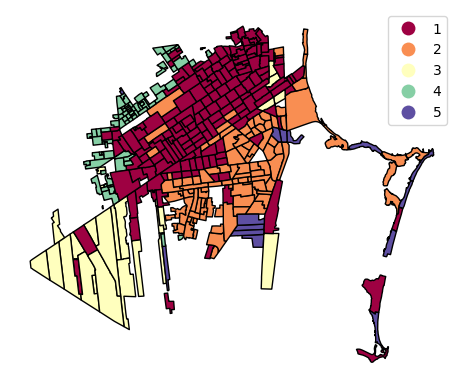

In [84]:
fig, ax = plt.subplots(1, 1)
ax.axis("off")
ageb_cun_all.plot('gpo', ax=ax, aspect=1, categorical=True, cmap='Spectral', edgecolor='k', legend=True)

In [85]:
df_tra.groupby("gpo").mean()

<ipython-input-85-06f04e86f7c5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tra.groupby("gpo").mean()


,f_1,f_2,f_3,f_4
gpo,,,,
1,0.175014,-0.410256,-0.695125,0.100284
2,0.293171,1.437439,0.185150,-0.030861
3,-0.685202,-0.717810,0.975924,2.663476
4,0.270919,-0.842400,1.004763,-0.808429
5,-4.652537,0.457683,-0.319515,-1.139426


In [86]:
df_tra.groupby("gpo")['gpo'].value_counts()

gpo  gpo
1    1      172
2    2      104
3    3       25
4    4       80
5    5       14
Name: gpo, dtype: int64

1. Viviendas Alto porcentaje de población joven. Bajo porcentaje de población económicamente activa y ocupada. Bajo grado promedio de estudios. Viviendas    

In [ ]:
componts

<font color="red">Actividad</font>

En esta actividad vas a repetir el proceso de esta práctica pero con los datos correspondientes a la ciudad de Mérida.

* Descarga los datos del Censo 2020 correspondientes al estado de Yucatán.
* Selecciona los datos de las AGEB ubicados en la ciudad de Mérida
* Selecciona las mismas columnas que usamos en el presente estudio y agrega otras que sean de tu interés.
* Explora el conjuto de datos: valores faltantes, gráficas de distribución, ...
* Transforma los datos: normaliza, estandariza,
* Aplica el análisis de factores e interpreta los resultados.
* Agrupa las AGEB y describe cada grupo.  

In [87]:
ageb_mer = gpd.read_file('/content/meridaAGEBS.geojson')
ageb_mer.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,3105000015329,31,050,0001,5329,"MULTIPOLYGON (((3779478.62330 1047307.49180, 3..."
1,3105000012466,31,050,0001,2466,"MULTIPOLYGON (((3777875.43480 1056949.72200, 3..."
2,310500001249A,31,050,0001,249A,"MULTIPOLYGON (((3779713.78160 1053802.75320, 3..."
3,3105000015827,31,050,0001,5827,"MULTIPOLYGON (((3772091.76200 1052572.14550, 3..."
4,3105000014706,31,050,0001,4706,"MULTIPOLYGON (((3772829.12810 1047931.31960, 3..."


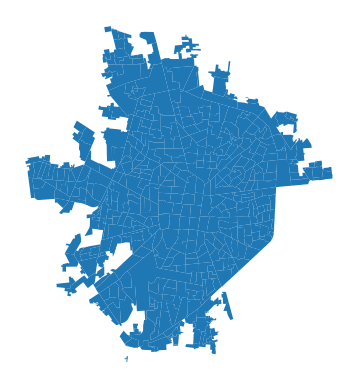

In [88]:
fig, ax = plt.subplots(1, 1)
ax.axis("off")
ageb_mer.plot(ax=ax, aspect=1, legend=False)
plt.show()